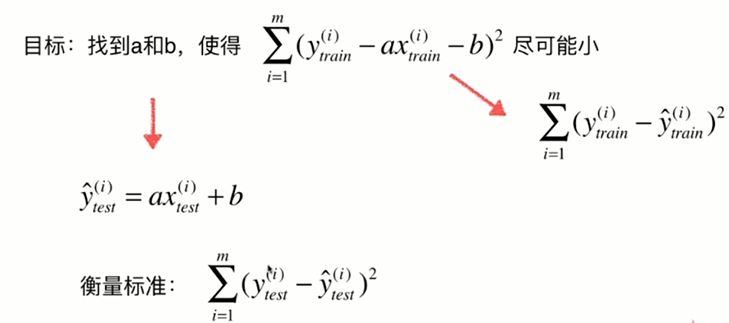

### 线性回归算法的评测

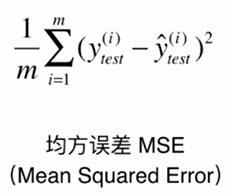

为了确保量纲的一致,这里进行开方处理

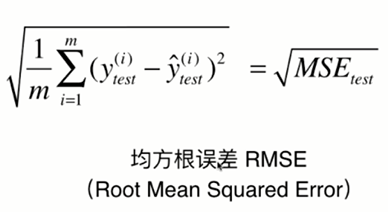

另一种评测

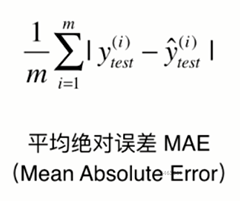

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### 波斯顿房产数据

In [2]:
boston = datasets.load_boston()

In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
x = boston.data[:,5]   # 执行用房价数量这个个特征

In [6]:
x.shape

(506,)

In [7]:
y = boston.target
y.shape

(506,)

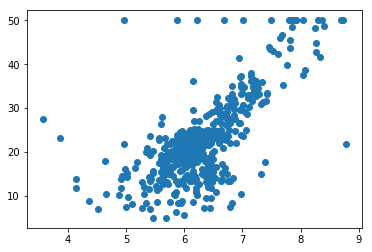

In [8]:
plt.scatter(x, y)

In [9]:
np.max(y)

50.0

In [10]:
x = x[y< 50.0]
y = y[y <50.0]

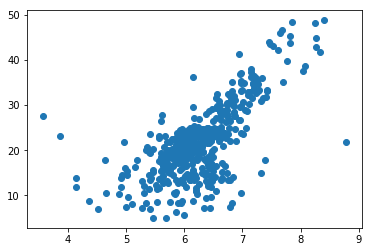

In [11]:
plt.scatter(x, y)   # 将边界上的带你进行排除

### 使用简单的线性回归法

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [13]:
x_train.shape

(367,)

In [14]:
x_test.shape

(123,)

In [15]:
from LinearRegress.SimpleLinearRegressionB import SimpleLinearRegression

In [16]:
reg =SimpleLinearRegression()
reg.fit(x_train, y_train)

SimpleLinearRegression()

In [17]:
reg.a_

8.387332898382036

In [18]:
reg.b_

-30.710523078350178

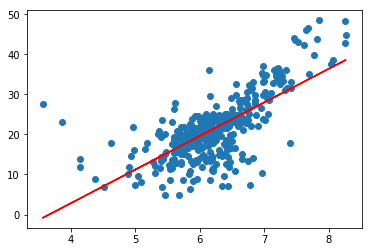

In [19]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')

In [20]:
y_predict = reg.predict(x_test)

### MSE

In [21]:
mse_test = np.sum((y_predict - y_test)**2) / len(y_test)
mse_test

37.39685343842723

### RMSE

In [22]:
from math import sqrt

rmse_test = sqrt(mse_test)
rmse_test

6.115296676239611

### MAE

In [23]:
mae_test = np.sum(np.absolute(y_predict - y_test)) / len(y_test)
mae_test

4.53649474691614

### scikit-learn中的MSE和MAE

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [25]:
mean_squared_error(y_test, y_predict)

37.39685343842723

In [26]:
mean_absolute_error(y_test, y_predict)

4.53649474691614

### RMSE vs MAE

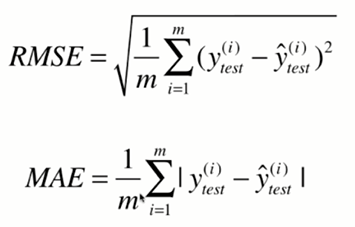

RMSE有个别较大值的差距